In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import minimize
%matplotlib inline
from sklearn.decomposition import PCA
from sympy import diff, symbols, cos, sin, tan
from scipy.optimize import differential_evolution
from scipy.misc import derivative
import scipy.stats as sts

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
def cosine(A, B):
    # длины векторов
    A_length = np.linalg.norm(A)
    B_length = np.linalg.norm(B)
    
    if (A_length * B_length) != 0:
        return np.dot(A, B) / (A_length * B_length)
    else:
        return 0

In [16]:
C = np.zeros((len(raitings), len(raitings)))
for user_1 in range(len(raitings)):
    max_dist = 0
    user_max_dist = 0
    A = raitings[user_1, :]
    for user_2 in range(len(raitings)):
        B = raitings[user_2, :]
        cosine_dist = cosine(A, B)
        C[user_1, user_2] = round(cosine_dist, 2)
        if cosine_dist > max_dist:
            if user_2 != user_1:
                max_dist = cosine_dist
                user_max_dist = user_2       
    print('Пользователь ', user_1, 'похож на пользователя', user_max_dist)      

Пользователь  0 похож на пользователя 8
Пользователь  1 похож на пользователя 4
Пользователь  2 похож на пользователя 9
Пользователь  3 похож на пользователя 9
Пользователь  4 похож на пользователя 8
Пользователь  5 похож на пользователя 9
Пользователь  6 похож на пользователя 3
Пользователь  7 похож на пользователя 5
Пользователь  8 похож на пользователя 0
Пользователь  9 похож на пользователя 2


In [17]:
C

array([[1.  , 0.83, 0.85, 0.78, 0.82, 0.74, 0.73, 0.81, 0.91, 0.86],
       [0.83, 1.  , 0.81, 0.85, 0.87, 0.83, 0.83, 0.8 , 0.83, 0.82],
       [0.85, 0.81, 1.  , 0.85, 0.78, 0.79, 0.68, 0.76, 0.82, 0.92],
       [0.78, 0.85, 0.85, 1.  , 0.69, 0.79, 0.83, 0.83, 0.78, 0.86],
       [0.82, 0.87, 0.78, 0.69, 1.  , 0.78, 0.78, 0.81, 0.88, 0.85],
       [0.74, 0.83, 0.79, 0.79, 0.78, 1.  , 0.74, 0.84, 0.81, 0.86],
       [0.73, 0.83, 0.68, 0.83, 0.78, 0.74, 1.  , 0.83, 0.81, 0.79],
       [0.81, 0.8 , 0.76, 0.83, 0.81, 0.84, 0.83, 1.  , 0.8 , 0.84],
       [0.91, 0.83, 0.82, 0.78, 0.88, 0.81, 0.81, 0.8 , 1.  , 0.9 ],
       [0.86, 0.82, 0.92, 0.86, 0.85, 0.86, 0.79, 0.84, 0.9 , 1.  ]])

Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

Воспользуемся PCA:

In [19]:
pca = PCA(n_components = 5)
pca.fit(raitings)
raitings_1 = pca.transform(raitings)
raitings_1

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

In [20]:
C_1 = np.zeros((len(raitings_1), len(raitings_1)))
for user_1 in range(len(raitings_1)):
    max_dist = 0
    user_max_dist = 0
    A = raitings_1[user_1, :]
    for user_2 in range(len(raitings_1)):
        B = raitings_1[user_2, :]
        cosine_dist = cosine(A, B)
        C[user_1, user_2] = round(cosine_dist, 2)
        if cosine_dist > max_dist:
            if user_2 != user_1:
                max_dist = cosine_dist
                user_max_dist = user_2       
    print('Пользователь ', user_1, 'похож на пользователя', user_max_dist) 

Пользователь  0 похож на пользователя 8
Пользователь  1 похож на пользователя 4
Пользователь  2 похож на пользователя 9
Пользователь  3 похож на пользователя 6
Пользователь  4 похож на пользователя 1
Пользователь  5 похож на пользователя 7
Пользователь  6 похож на пользователя 3
Пользователь  7 похож на пользователя 5
Пользователь  8 похож на пользователя 0
Пользователь  9 похож на пользователя 8


Для пользователей 4, 5 и 9 похожие пользователи стали иными...

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

$f(x) = tg^2(sin(x) + cos(2x+3))$  

$ f'(x) = 2 \cdot tg(sin(x) + cos(2x+3)) \cdot \frac {1}{cos^2(sin(x) + cos(2x+3))} \cdot (cos(x) - sin(2 \cdot x +3) \cdot 2) =\\ =\frac {2 \cdot sin(sin(x) + cos(2x+3))}{cos^3(sin(x) + cos(2x+3))} \cdot (cos(x) - sin(2 \cdot x +3) \cdot 2)$  

$ f'(1) = \frac {2 \cdot sin(sin(1) + cos(5))}{cos^3(sin(1) + cos(5))} \cdot (cos(1) - sin(5) \cdot 2)$  

In [42]:
dif_x = (2*np.sin(np.sin(1) + np.cos(5)) / ((np.cos(np.sin(1) + np.cos(5))))**3) * (np.cos(1) - np.sin(5)*2)
dif_x  

55.385917635337854

In [55]:
def f(x):
    return (np.tan(np.sin(x) + np.cos(2*x+3)))**2
derivative(f, 1.0, dx=1e-6)

55.3859176464222

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [58]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [59]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [60]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

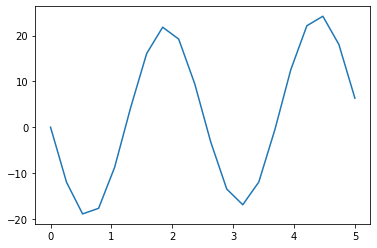

In [61]:
plt.plot(x, fx)
plt.show()

In [62]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [63]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(error, bounds, seed=42)

In [64]:
result

     fun: 1.5130289208187264e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])

In [65]:
def g(x):
    return np.e**result.x[0] * np.sin(result.x[1]*x) + x

In [66]:
h = []
er = []
for i in range(len(x)):
    h.append(g(x[i]))
    er.append(np.abs(fx[i] - g(x[i])))

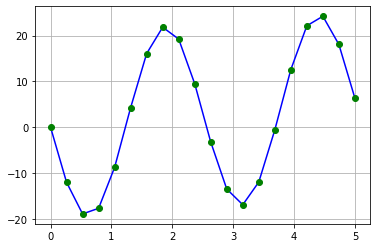

In [67]:
plt.plot(x, fx , 'b-')
plt.plot(x, h, 'g o')
plt.grid()
plt.show()

In [70]:
d = {'x': x, 'fx': fx, 'gx' : h, 'error' : er}
result = pd.DataFrame(data =d)

In [71]:
result

,x,fx,gx,error
0,0.000000,0.000000,0.000000,0.000000e+00
1,0.263158,-12.018191,-12.018191,1.850566e-07
2,0.526316,-18.909686,-18.909686,1.163715e-08
3,0.789474,-17.687866,-17.687866,9.369365e-08
4,1.052632,-8.752911,-8.752911,4.460119e-08
5,1.315789,4.275245,4.275245,1.903469e-07
6,1.578947,16.068013,16.068013,5.898660e-08
7,1.842105,21.812502,21.812502,1.379935e-08
8,2.105263,19.220598,19.220598,5.025855e-08
9,2.368421,9.484112,9.484112,1.183651e-07


### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [74]:
x = np.linspace(0,10,1001)
rv = sts.expon(2)
sample = rv.rvs(size=20)

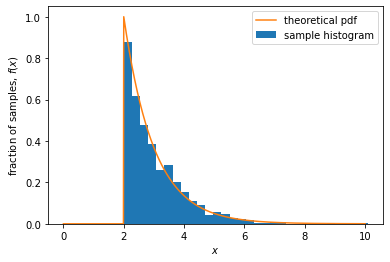

In [75]:
x = np.linspace(0,10,1001)
pdf = rv.pdf(x)
plt.hist(sample, density=True, bins=30, label='sample histogram')
plt.plot(x, pdf, label='theoretical pdf', alpha=5)
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')
plt.show()

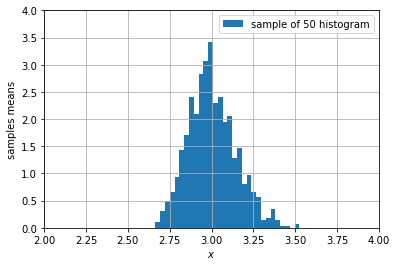

In [80]:
number_list = 50

samples_count = 1000

a = np.array([])
for index in range(samples_count):
    sample = rv.rvs(size = number_list)
    a = np.append(a, sample.mean())

label = 'sample of ' + str(number_list) + ' histogram'
plt.axis([2, 4, 0, 4])
plt.hist(a, density = True, label = label, bins = 30)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')

plt.grid()
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

[1, 1]]

In [81]:
N = np.array([[1, 4],
              [1, 1]])
print(N)

[[1 4]
 [1 1]]


In [84]:
n, v = np.linalg.eig(N)

In [85]:
for i in range(len(n)):
    print("Собственное значение " + str(n[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]


Найдем собственные значения:

$det(N - \lambda \cdot E) = 0$  

$(1 - \lambda) ^ 2 - 4 =0$

Т.е.:  
$\lambda = -1$ или $\lambda = 3$

Найдем собственные вектора:

$ N \cdot x = \lambda \cdot x$  



При $\lambda = 3$ 

$\begin{pmatrix}
  1 & 4\\
  1 & 1
\end{pmatrix} 
\cdot 
\begin{pmatrix}
  x_1 \\
  x_2
\end{pmatrix} 
=
3 \cdot
\begin{pmatrix}
  x_1 \\
  x_2
\end{pmatrix} $

$1 \cdot x_1 + 4 \cdot x_2 = 3 \cdot x_1 $

$x_1 = 2 \cdot x_2 $  

Тогда:  

$x_1 = 2 , x_2 = 1$





При $\lambda = -1$ 

$\begin{pmatrix}
  1 & 4\\
  1 & 1
\end{pmatrix} 
\cdot 
\begin{pmatrix}
  x_1 \\
  x_2
\end{pmatrix} 
=
-1 \cdot
\begin{pmatrix}
  x_1 \\
  x_2
\end{pmatrix} $

$1 \cdot x_1 + 4 \cdot x_2 = - x_1 $  

$x_1 = -2 \cdot x_2 $   

Тогда:  

$x_1 = 2 , x_2 = -1$